# Abstract

Obtained results indicate energy_gb had the highest correlation coefficient (r = +0.45) with RMSD.

Near native structures (RMSD < 1.5 angstroms) were predicted using machine learning classifiers. Top performing classifiers include: a Support Vector Machine (SVM) with a radial basis function kernel, and a k-Neareset Neighbours classifier, predicting near native structures with (95.58 +/- 0.23)% and (95.57 +/- 0.30)% accuracy [respectively](#results).

## Table of Contents

* [1. Descriptive Statistics of Features](#Descriptive Statistics of Features)
* [2. Predictions and Comparing Classification Algorithms](#Predictions and Comparing Classification Algorithms)

## Load: Rashid's Molecular Dynamics Dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('1mii_ML.csv', index_col=0) # set index as 'Frame' (i.e. the time in the simulation)
index = 'Frame'

# df = pd.read_csv('1mii_ML.csv', index_col=3) # set index as 'RMSD' (i.e. the time in the simulation)
# index = 'RMSD'

column_names = df.columns[0:len(df.columns) - 1]
print(column_names)

# goals: minimize RMSD and total energy

df.head()

Index(['Hbonds', 'Molsurf', 'RMSD', 'ROG', 'end-to-end', 'energy_angle',
       'energy_bond', 'energy_dihedral', 'energy_elec', 'energy_elec14',
       'energy_gb', 'energy_vdw', 'energy_vdw14', 'ss_3-10', 'ss_APBS',
       'ss_PBS', 'ss_alpha', 'ss_bend', 'ss_none', 'ss_pi'],
      dtype='object')


,Hbonds,Molsurf,RMSD,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,...,energy_vdw,energy_vdw14,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn
Frame,,,,,,,,,,,,,,,,,,,,,
0,4,698.912338,4.234889,6.584806,10.671312,123.723222,31.631192,212.147892,-1112.125804,712.598326,...,-82.217559,38.940037,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706
1,2,710.001821,4.226051,6.681199,10.874207,122.684917,36.635134,205.920390,-1120.472605,712.279466,...,-81.428032,37.335000,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706
2,2,722.223469,4.246277,6.613796,10.715682,119.322729,27.421875,207.357482,-1101.946781,715.368704,...,-85.804202,43.409406,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706
3,1,731.405021,4.382348,6.619212,10.855698,124.979237,29.662107,207.311274,-1106.488020,707.667941,...,-81.468523,37.548546,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059
4,2,707.606087,4.199144,6.587362,10.151879,122.256788,25.553019,215.603360,-1106.309467,712.102749,...,-87.046542,39.587838,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059


## Descriptive Statistics of Features <a class="anchor" id="Descriptive Statistics of Features"></a>

In [2]:
df.describe()

,Hbonds,Molsurf,RMSD,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,...,energy_vdw,energy_vdw14,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.303480,712.918745,2.436149,6.891291,10.213339,141.400571,41.815779,212.035426,-1062.970717,692.458955,...,-76.807479,41.302760,4.500294,0.098000,0.0,23.601941,18.465588,32.727059,0.243529,20.314529
std,1.356392,24.231206,0.729003,0.206231,2.183403,10.890576,6.196861,6.656541,35.402334,13.306025,...,5.316868,2.978070,9.092513,1.070892,0.0,12.375193,8.579102,7.480982,2.732150,11.950151
min,0.000000,613.168142,0.556156,6.225668,3.307014,98.447172,20.724943,187.721375,-1211.892263,638.019094,...,-98.252769,30.744799,0.000000,0.000000,0.0,0.000000,0.000000,11.764706,0.000000,0.000000
25%,1.000000,696.938911,1.922509,6.744024,8.990611,134.024942,37.484184,207.503152,-1080.961223,683.351456,...,-80.366477,39.253790,0.000000,0.000000,0.0,23.529412,11.764706,29.411765,0.000000,11.764706
50%,2.000000,713.464995,2.279555,6.888237,10.457180,141.699559,41.671991,211.850178,-1057.099887,692.846660,...,-76.797692,41.198407,0.000000,0.000000,0.0,23.529412,17.647059,29.411765,0.000000,17.647059
75%,3.000000,728.890303,2.809507,7.034832,11.783581,148.948314,45.963160,216.323829,-1038.926795,701.847592,...,-73.233943,43.237519,0.000000,0.000000,0.0,29.411765,23.529412,35.294118,0.000000,29.411765
max,9.000000,810.767202,5.280286,8.025102,15.464560,189.116158,70.670769,249.904017,-959.916749,746.729475,...,-48.010786,58.468123,70.588235,17.647059,0.0,58.823529,70.588235,70.588235,47.058824,76.470588


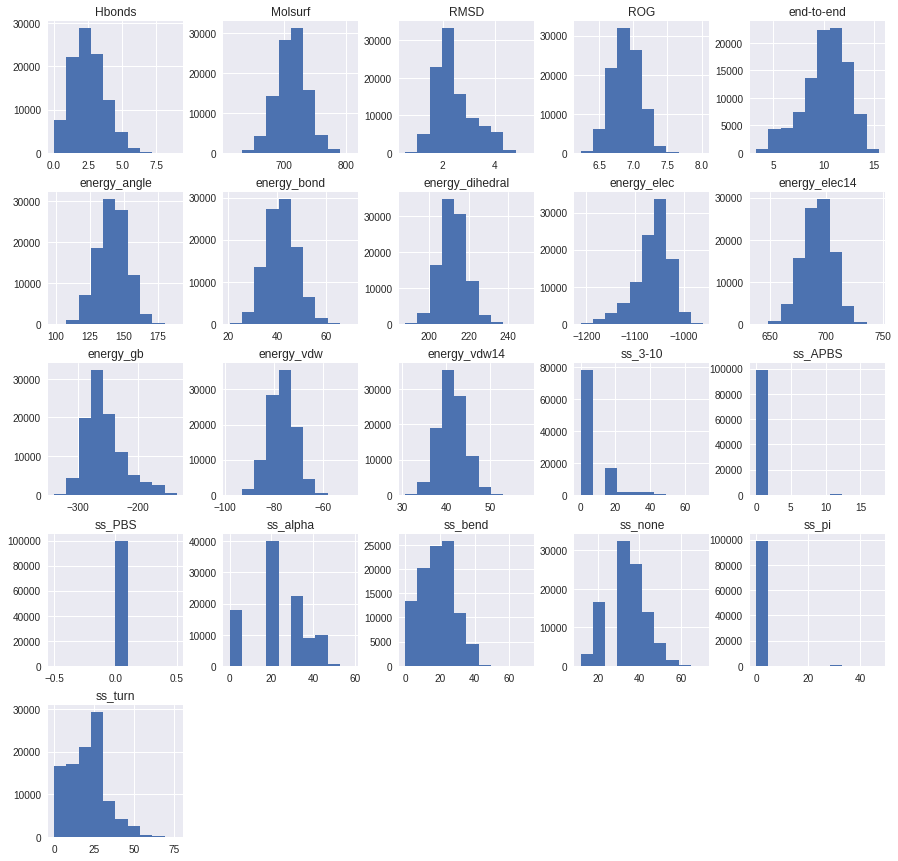

In [3]:
df.hist(figsize=(15,15))
plt.show()

In [4]:
column_x = df.columns[0:len(df.columns) - 1]
column_x

Index(['Hbonds', 'Molsurf', 'RMSD', 'ROG', 'end-to-end', 'energy_angle',
       'energy_bond', 'energy_dihedral', 'energy_elec', 'energy_elec14',
       'energy_gb', 'energy_vdw', 'energy_vdw14', 'ss_3-10', 'ss_APBS',
       'ss_PBS', 'ss_alpha', 'ss_bend', 'ss_none', 'ss_pi'],
      dtype='object')

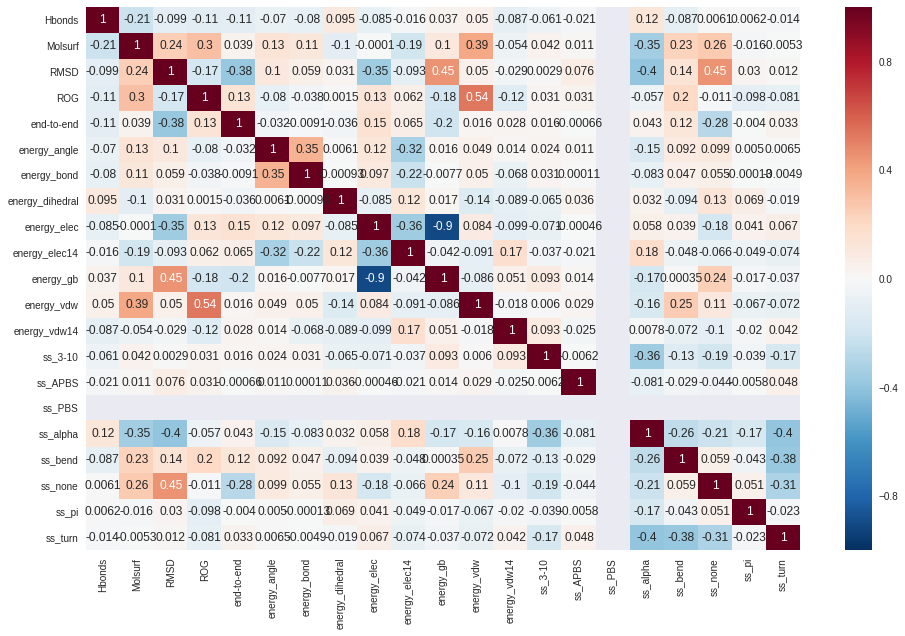

In [5]:
corr = df[df.columns].corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr, annot = True)
plt.show()

## Discussion

* RMSD and energy_gb share a fairly strong positive correlation. Perhaps by minimizing energy_gb, we can minimize RMSD?
* Energy_elec and energy_gb are highly negatively correlated, why?


## Further Work

* Add total energy as a feature to this dataframe in the intro, how is this correlated with the other features?

## How does the RMSD and total energy evolve over time, in the simulation?

* 'Frame' describes the time that has elapsed within the molecular dynamics simulation 

In [6]:
# return the total energy for each frame
all_energy_terms = df.iloc[:,5:13]
total_energy = all_energy_terms.sum(axis=1)

# append total_energy to existing dataframe
df['total_energy'] = total_energy

# create new dataframe of just total energy and rmsd
total_energy_v_rmsd = df.iloc[:,-1]
total_energy_v_rmsd = total_energy_v_rmsd.to_frame()
total_energy_v_rmsd['RMSD'] = df.iloc[:,2]

total_energy_v_rmsd.head()

# how do the other terms effect the total energy?
# which energy terms contribute most to the total energy?
# how are total energy and RMSD correlated?

,total_energy,RMSD
Frame,,
0,-312.114451,4.234889
1,-312.299985,4.226051
2,-315.325563,4.246277
3,-312.515474,4.382348
4,-310.014401,4.199144


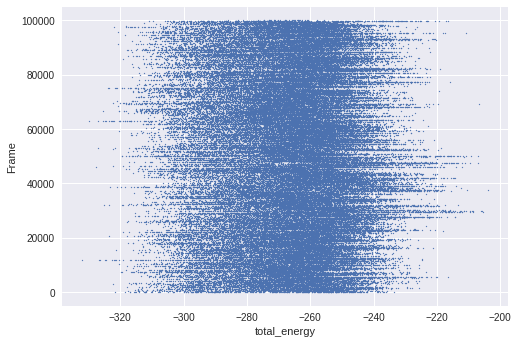

In [7]:
y = total_energy_v_rmsd.index

plt.scatter(total_energy_v_rmsd['total_energy'], y, s=1) # s describes the size of the marker
plt.xlabel('total_energy')
plt.ylabel('Frame')
plt.show()

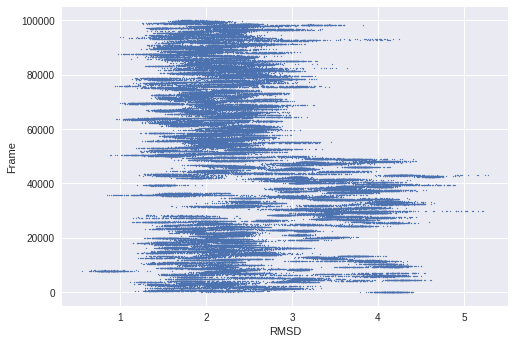

In [8]:
y = total_energy_v_rmsd.index

plt.scatter(total_energy_v_rmsd['RMSD'], y, s=1)
plt.xlabel('RMSD')
plt.ylabel('Frame')
plt.show()

### Note:

* There seems to be a rapid decrease in RMSD around frame 50,000. Why is this?
* RMSD seems to increase temporarily between frames 20,000-50,000. 
* RMSD spike near the end of the simulation.

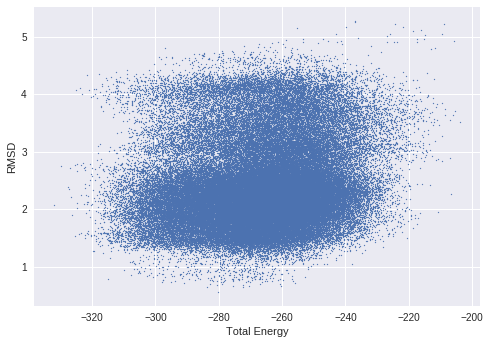

In [9]:
# phase portrait
plt.scatter(total_energy_v_rmsd['total_energy'], total_energy_v_rmsd['RMSD'], s=1)
plt.xlabel('Total Energy')
plt.ylabel('RMSD')
plt.show()

## Conclusions

* Total energy alone can not accurately predict RMSD. We need to see how the other parameters effect RMSD. 

## Note:

* The 100,000 frames are actually 100 seperate different MD simulations that last for 1,000 frames each. 
* Plot a single MD run, and also see an average

In [10]:
# classification of near native structures
# regression of RMSD

In [11]:
df.head()

,Hbonds,Molsurf,RMSD,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,...,energy_vdw14,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn,total_energy
Frame,,,,,,,,,,,,,,,,,,,,,
0,4,698.912338,4.234889,6.584806,10.671312,123.723222,31.631192,212.147892,-1112.125804,712.598326,...,38.940037,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-312.114451
1,2,710.001821,4.226051,6.681199,10.874207,122.684917,36.635134,205.920390,-1120.472605,712.279466,...,37.335000,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-312.299985
2,2,722.223469,4.246277,6.613796,10.715682,119.322729,27.421875,207.357482,-1101.946781,715.368704,...,43.409406,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-315.325563
3,1,731.405021,4.382348,6.619212,10.855698,124.979237,29.662107,207.311274,-1106.488020,707.667941,...,37.548546,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059,-312.515474
4,2,707.606087,4.199144,6.587362,10.151879,122.256788,25.553019,215.603360,-1106.309467,712.102749,...,39.587838,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059,-310.014401


In [12]:
y = df['RMSD'] # assign targets
X = df.iloc[:,0:22] # assign features

del X['RMSD'] # remove target from features

X.head()

# df.shape

,Hbonds,Molsurf,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,energy_gb,...,energy_vdw14,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn,total_energy
Frame,,,,,,,,,,,,,,,,,,,,,
0,4,698.912338,6.584806,10.671312,123.723222,31.631192,212.147892,-1112.125804,712.598326,-236.811758,...,38.940037,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-312.114451
1,2,710.001821,6.681199,10.874207,122.684917,36.635134,205.920390,-1120.472605,712.279466,-225.254255,...,37.335000,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-312.299985
2,2,722.223469,6.613796,10.715682,119.322729,27.421875,207.357482,-1101.946781,715.368704,-240.454777,...,43.409406,0.0,0.0,0,29.411765,11.764706,47.058824,0.0,11.764706,-315.325563
3,1,731.405021,6.619212,10.855698,124.979237,29.662107,207.311274,-1106.488020,707.667941,-231.728036,...,37.548546,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059,-312.515474
4,2,707.606087,6.587362,10.151879,122.256788,25.553019,215.603360,-1106.309467,712.102749,-231.762146,...,39.587838,0.0,0.0,0,23.529412,11.764706,47.058824,0.0,17.647059,-310.014401


## Predictions and Comparing Regression Algorithms <a class="anchor" id="Predictions and Comparing Classification Algorithms"></a>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=123)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("%20s | Accuracy: %0.2f%%" % ('Linear Regression', lr_score*100))

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr_score = knr.score(X_test, y_test)
print("%20s | Accuracy: %0.2f%%" % ('k-Nearest Regressor', knr_score*100))

   Linear Regression | Accuracy: 50.66%
 k-Nearest Regressor | Accuracy: 59.75%


In [40]:
X_train.head()

,Hbonds,Molsurf,ROG,end-to-end,energy_angle,energy_bond,energy_dihedral,energy_elec,energy_elec14,energy_gb,...,energy_vdw14,ss_3-10,ss_APBS,ss_PBS,ss_alpha,ss_bend,ss_none,ss_pi,ss_turn,total_energy
Frame,,,,,,,,,,,,,,,,,,,,,
10189,1,717.112892,7.151279,9.209706,147.951569,41.760300,213.539864,-1012.900140,692.374268,-303.909190,...,44.281050,0.0,0.0,0,29.411765,17.647059,23.529412,0.0,29.411765,-250.280262
35762,4,698.134065,6.908837,11.176891,129.712799,31.437827,219.315390,-1119.838765,704.008658,-213.511219,...,44.708668,0.0,0.0,0,0.000000,23.529412,35.294118,0.0,41.176471,-281.671481
26249,0,688.403888,6.887151,13.134402,130.466923,44.818445,222.036162,-1038.063077,693.772329,-278.712148,...,43.748110,0.0,0.0,0,29.411765,5.882353,41.176471,0.0,23.529412,-256.803107
32639,4,704.420197,6.675918,11.155185,143.238385,39.692057,215.199608,-1094.565845,694.046362,-232.305014,...,39.138318,0.0,0.0,0,35.294118,23.529412,35.294118,0.0,5.882353,-277.500423
81452,2,764.979656,6.543281,7.911406,156.905367,46.656650,202.338979,-1072.192838,685.758824,-241.648606,...,42.810771,0.0,0.0,0,23.529412,23.529412,41.176471,0.0,11.764706,-252.266495


<a class="anchor" id="results"></a>

In [41]:
lr.coef_

array([ -5.64560227e-02,   2.09684999e-03,  -7.27617851e-01,
        -8.27110673e-02,   1.42950126e+10,   1.42950126e+10,
         1.42950126e+10,   1.42950126e+10,   1.42950126e+10,
         1.42950126e+10,   1.42950126e+10,   1.42950126e+10,
        -7.08484650e-02,  -2.50720531e-02,   4.99881887e+05,
        -8.09593201e-02,  -6.05206490e-02,  -4.64067459e-02,
        -7.46825933e-02,  -6.62078857e-02,  -1.42950126e+10])

In [42]:
lr.intercept_

18.400359369702478

In [43]:
import matplotlib.pyplot as plt

count = 0
features = []
coefs = []

for feature in X_train:
    features.append(feature)
    coefs.append(lr.coef_[count])
    count +=1

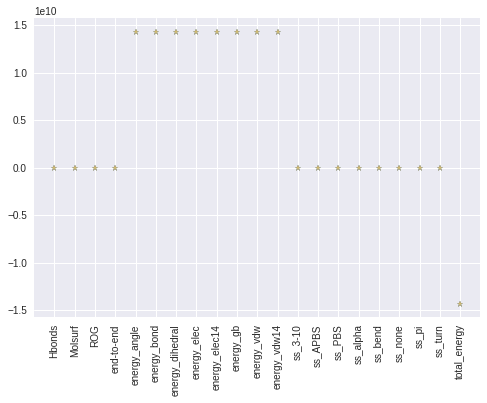

In [51]:
import pylab as pl

x = range(len(coefs))
xTicks = features
y = coefs
pl.xticks(x, xTicks)
pl.xticks(range(len(coefs)), xTicks, rotation=90) #writes strings with 45 degree angle
pl.plot(x,y,'*')
pl.show()

## Discussion

The linear regression model seems to only use the energy terms to draw the line. All of the coefficients of the energy terms are exactly the same. 

Try removing all features except for the energy terms and do linear regression again.